# Data Processing
## Objective
__This notebook performs data cleaning, preprocessing, and feature transformation
on the raw employee performance dataset. The cleaned data is saved for further
analysis and modeling.__

In [ ]:
# Importing the Libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Load the Data 

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [4]:
df.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [ ]:
# Checking for Duplicates

In [8]:
df.duplicated().sum()

0

In [ ]:
# No duplicates found

In [ ]:
# Checking for Missing Values

In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [ ]:
# No missing values found

In [ ]:
# Target Variable

In [11]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

### Note

__A cleaned, non-encoded dataset was saved to perform exploratory data analysis with human-readable categories, while encoding was applied separately for model training to ensure correct interpretation and modeling efficiency.__

In [13]:
import os

os.makedirs('data/processed', exist_ok=True)

In [14]:
df.to_csv('data/processed/eda_employee_data.csv', index=False)

### Encoding

In [20]:
df_model = df.copy()

In [ ]:
# checking for categorical columns

In [21]:
df_model.select_dtypes(include='object').columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

In [23]:
df_model.head()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     1200 non-null   int32
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int32
 3   EducationBackground           1200 non-null   int32
 4   MaritalStatus                 1200 non-null   int32
 5   EmpDepartment                 1200 non-null   int32
 6   EmpJobRole                    1200 non-null   int32
 7   BusinessTravelFrequency       1200 non-null   int32
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

### Outlier Handling

In [25]:
# checking for continious columns 
continuous_cols = [col for col in df.columns 
                   if df[col].nunique() > 5 and df[col].dtype != 'object']
print("Continuous Columns for Outlier Detection:")
print(continuous_cols)

Continuous Columns for Outlier Detection:
['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


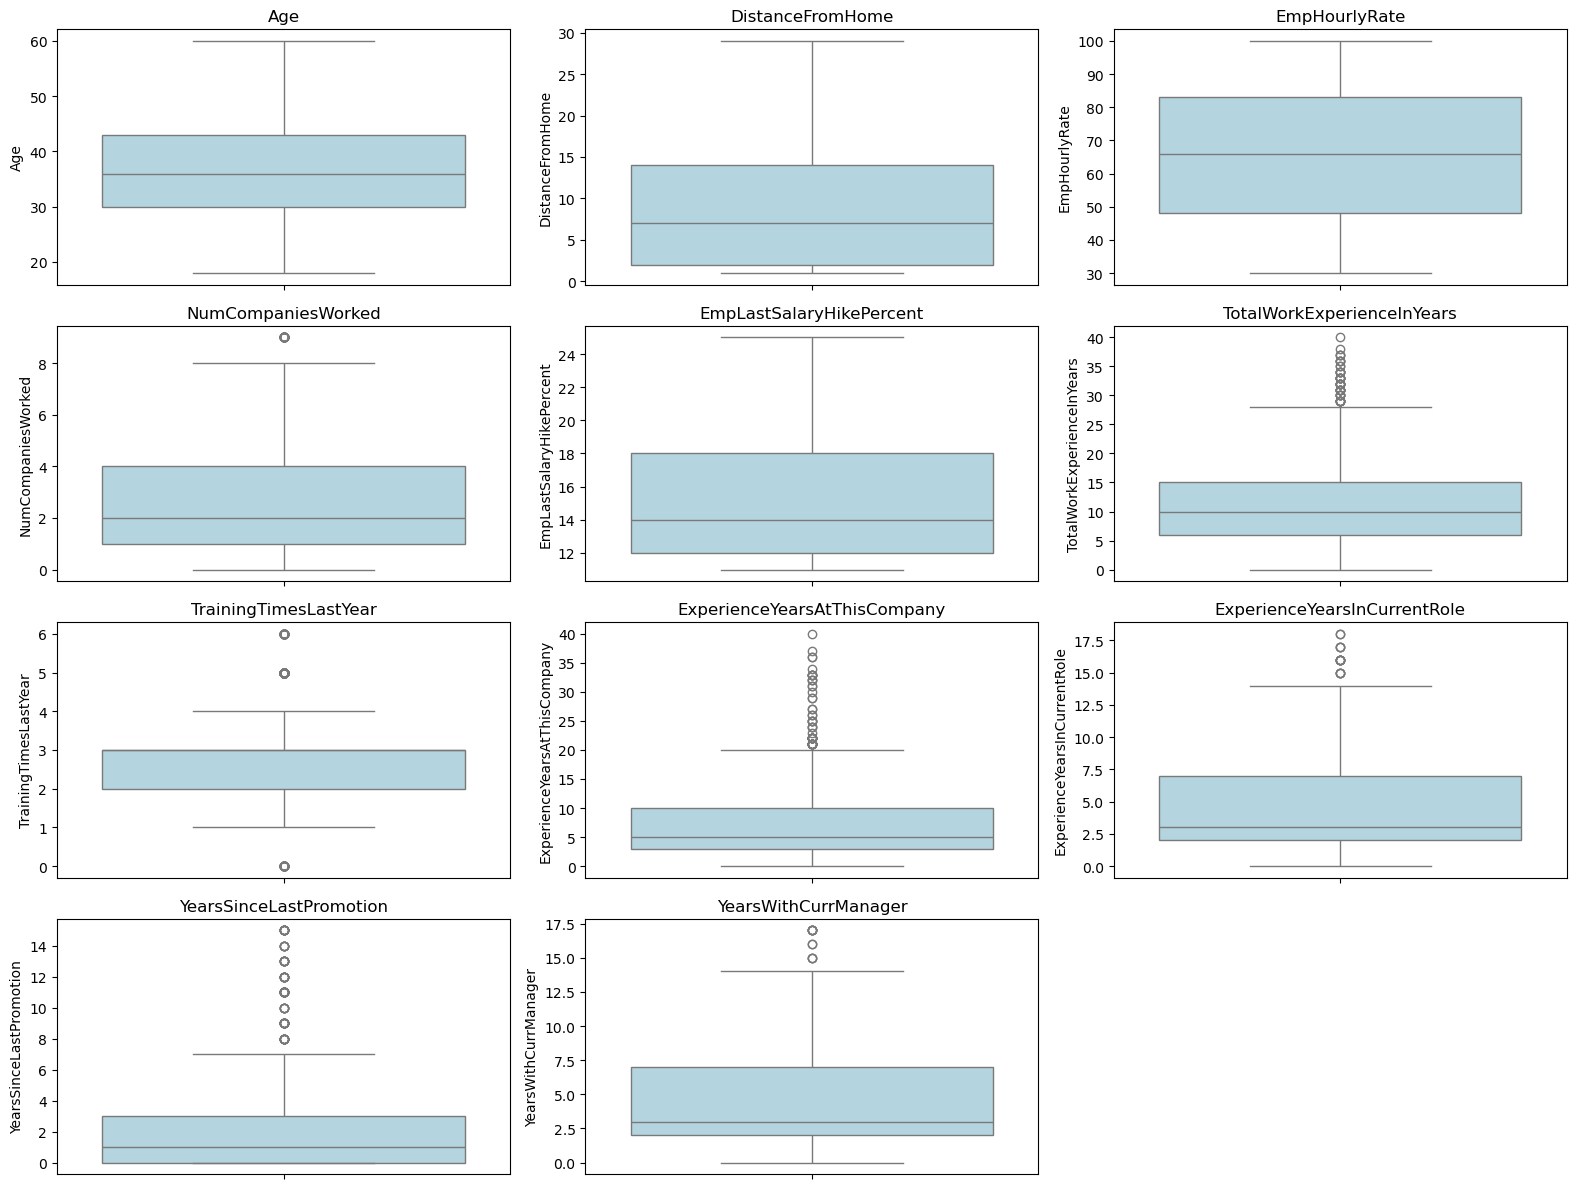

In [29]:
plt.figure(figsize=(16,12))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()

### Note

__Boxplot analysis indicated the presence of statistical outliers in experience- and tenure-related variables. These values represent valid employee characteristics such as seniority and long-term service. Hence, no outlier removal was performed to preserve business realism.__

### Heat Map

### Independent v/s Independent [HeatMap]

<Axes: >

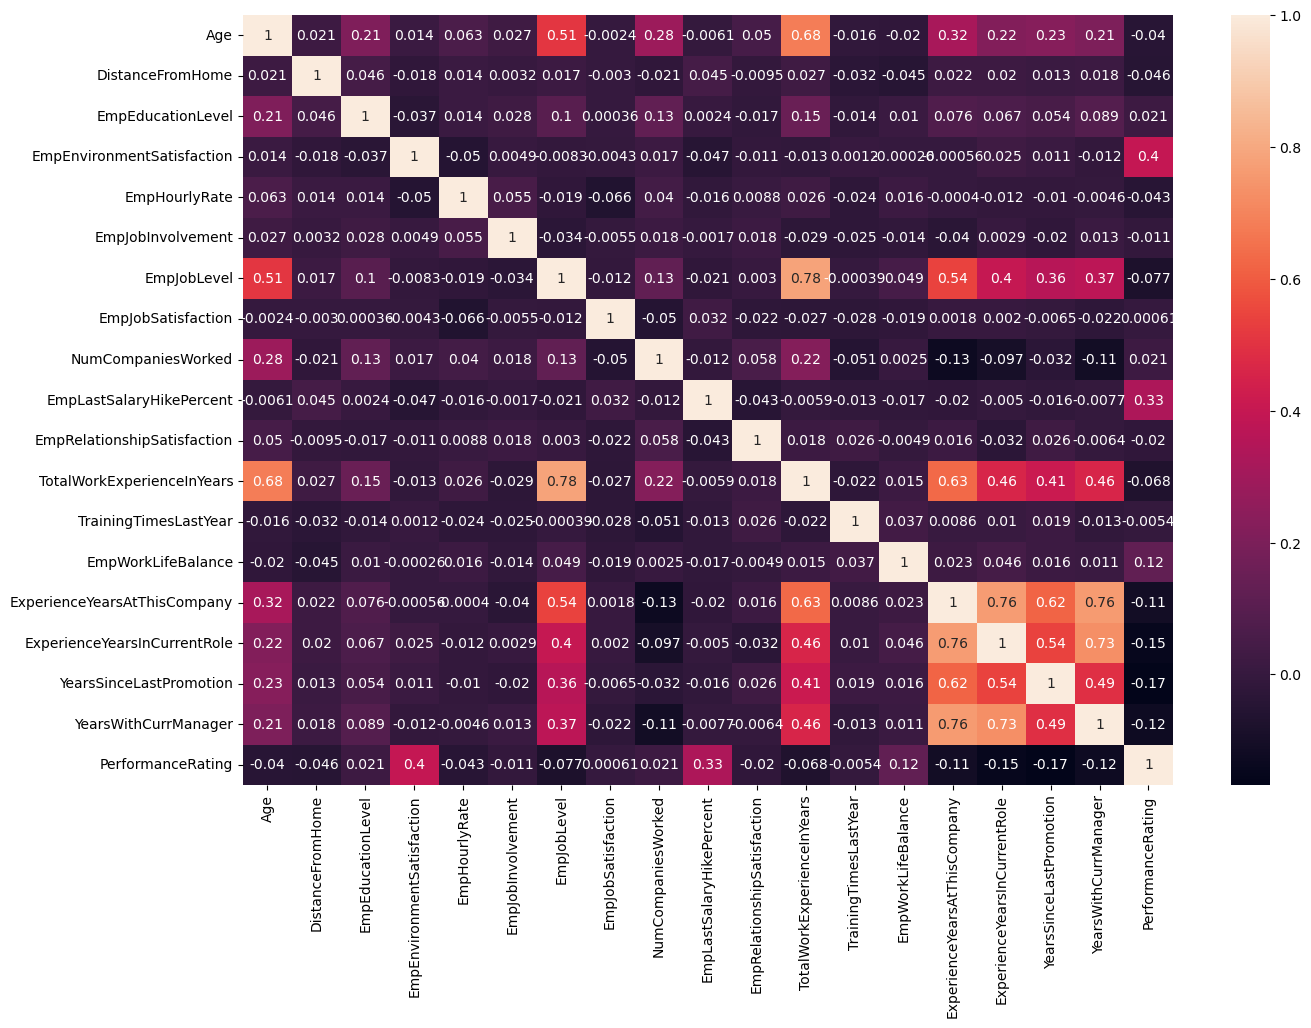

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(
    df.select_dtypes(include=['int64','float64'])
        .drop(['Target'], axis=1, errors='ignore')
        .corr(),
    annot=True,
)

In [ ]:
# Checking for Higly Corelated Feature 

In [33]:
num_df = df.select_dtypes(include=['int64', 'float64']).copy()

num_df_independent = num_df.loc[:, num_df.columns != 'SalePrice']
corr_matrix = num_df_independent.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = []
for row in upper.index:
    for col in upper.columns:
        if upper.loc[row, col] > 0.8:
            high_corr.append((row, col, upper.loc[row, col]))

print("\nHighly Correlated Feature Pairs (corr > 0.8):\n")
for pair in high_corr:
    print(f"{pair[0]} <----> {pair[1]}   (corr = {pair[2]:.3f})")


Highly Correlated Feature Pairs (corr > 0.8):



### Note

__Correlation analysis revealed strong relationships among experience- and tenure-related features. These correlations are expected due to the nature of employee career progression. Since tree-based models are robust to multicollinearity, all features were retained for model training to preserve business information.__

### Independent vs Dependent Features[Heat Map]

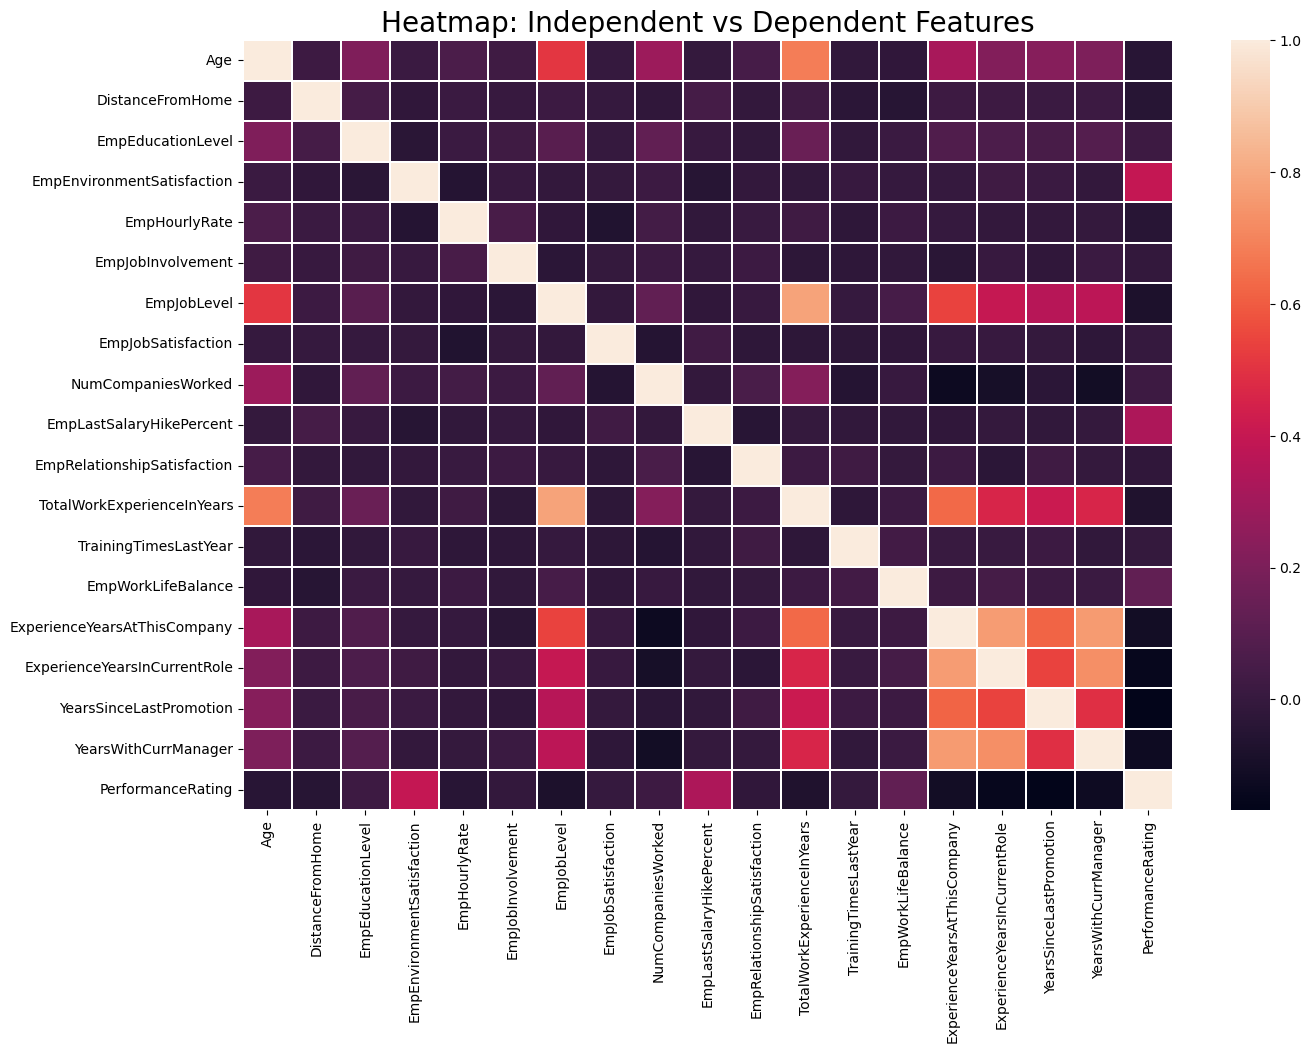

In [35]:
num_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(),annot=False, linewidths=0.3)
plt.title("Heatmap: Independent vs Dependent Features", fontsize=20)
plt.show()

In [ ]:
# Checking for Weekly Corelated Features 

In [37]:
corr_with_target = num_df.corr()['PerformanceRating'].abs()

# Setting a threshold for weak correlation
threshold = 0.05

weak_features = corr_with_target[corr_with_target < threshold].index.tolist()

print("Weakly Correlated Features (corr < 0.05):\n")
for col in weak_features:
    print(f"{col} : {corr_with_target[col]:.4f}")

Weakly Correlated Features (corr < 0.05):

Age : 0.0402
DistanceFromHome : 0.0461
EmpEducationLevel : 0.0205
EmpHourlyRate : 0.0431
EmpJobInvolvement : 0.0105
EmpJobSatisfaction : 0.0006
NumCompaniesWorked : 0.0210
EmpRelationshipSatisfaction : 0.0195
TrainingTimesLastYear : 0.0054


### Note 

__Several features showed weak linear correlation with the target variable. However, these features represent meaningful employee attributes and may contribute through non-linear relationships and interactions. Hence, no feature was removed solely based on low correlation.__

In [38]:
df_model.to_csv('data/processed/model_employee_data.csv', index=False)